### Importing necessary libraries

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import skimage.transform
from scipy import ndimage
import skimage.color
import skimage.io
from tabulate import tabulate

### Reading given Images

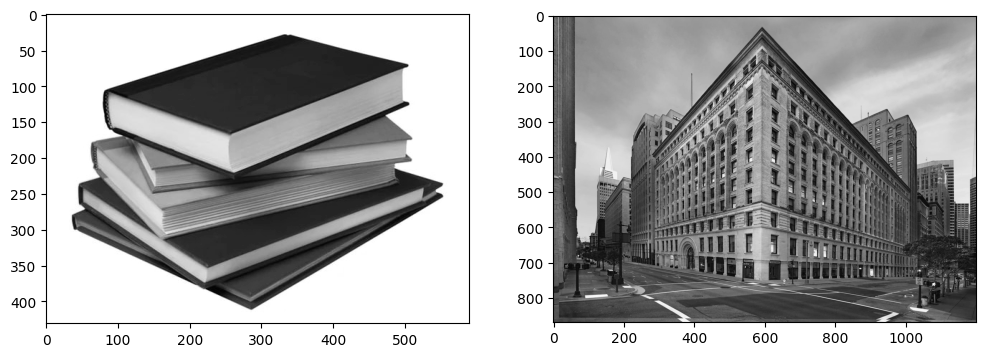

In [2]:
books = skimage.color.rgb2gray(skimage.io.imread('books.jpg'))
building = skimage.color.rgb2gray(skimage.io.imread('building.jpg'))
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building,cmap='gray')
plt.show()

### STEP 1: Scale Space Extrema Detection

In [3]:
def extremas(lower_layer, layer, upper_layer, h, w):
    extrema_points = np.zeros([h, w])
    is_extrema = -1
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            centre_val = layer[i,j]
            grid = layer[i-1:i+2,j-1:j+2]
            u_grid = upper_layer[i-1:i+2,j-1:j+2]
            l_grid = lower_layer[i-1:i+2,j-1:j+2]
            grid[1,1] = -1
            if(np.max(grid)<centre_val):
                if(centre_val>max(np.max(u_grid),np.max(l_grid))):
                    extrema_points[i,j] = 1
            else:
                grid[1,1] = 256
                if(np.min(grid)>centre_val):
                    if(centre_val<min(np.min(u_grid),np.min(l_grid))):
                        extrema_points[i,j] = 1

            
    return extrema_points

def agmentation(features,h,w):
    augmented = np.zeros([h,w])
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if features[i, j] == 1:
                augmented[i - 1:i + 2, j - 1:j + 2] = augmented[i - 1:i + 2, j - 1:j + 2] + 1
    augmented = augmented >= 1
    return augmented

def scale_space_extrema_detection(image):
    sigma = 1.5
    s = 10  # s (11) Discrete_Gaussian_Scale_Space_, s-1 (10) Differece_of_gaussians, s-3 (8) scale space extrema layers
    k = 2 ** (1 / (s - 1))  # 0 to s-1 = s Discrete_Gaussian_Scale_Space_
    Discrete_Gaussian_Scale_Space_ = [None] * s
    for i in range(s):
        Discrete_Gaussian_Scale_Space_[i] = ndimage.gaussian_filter(image, sigma * (k ** i)) * 255

    Differece_of_gaussians = [None] * (s - 1)
    for i in range(s - 1):
        Differece_of_gaussians[i] = Discrete_Gaussian_Scale_Space_[i + 1] - Discrete_Gaussian_Scale_Space_[i]

    extrema_points_matrices = [None] * (s - 3)
    for i in range(s - 3):
        extrema_points_matrices[i] = extremas(Differece_of_gaussians[i].copy(), Differece_of_gaussians[i+1].copy(), Differece_of_gaussians[i + 2].copy(), image.shape[0],image.shape[1])

    all_features = np.array(extrema_points_matrices)
    all_features = np.sum(all_features,axis = 0)
    all_features = all_features>=1
    no_of_features = np.sum(all_features)
    all_features = agmentation(all_features,image.shape[0],image.shape[1])
  
    return all_features,no_of_features


In [4]:
books_original = scale_space_extrema_detection(books)
building_original = scale_space_extrema_detection(building)

### SIFT on Original Images

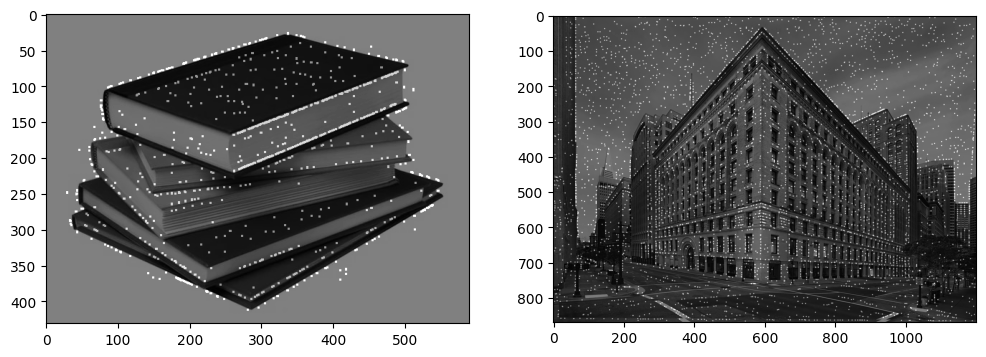

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books+books_original[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building+building_original[0],cmap='gray')
plt.show()

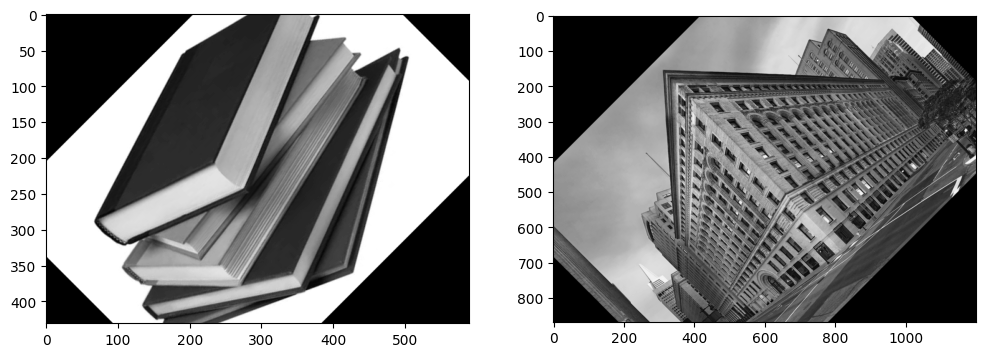

In [6]:
books_rotated = skimage.transform.rotate(books, 45)
building_rotated = skimage.transform.rotate(building, 45)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_rotated,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_rotated,cmap='gray')
plt.show()

In [7]:
books_rotated_SIFT = scale_space_extrema_detection(books_rotated)
building_rotated_SIFT = scale_space_extrema_detection(building_rotated)

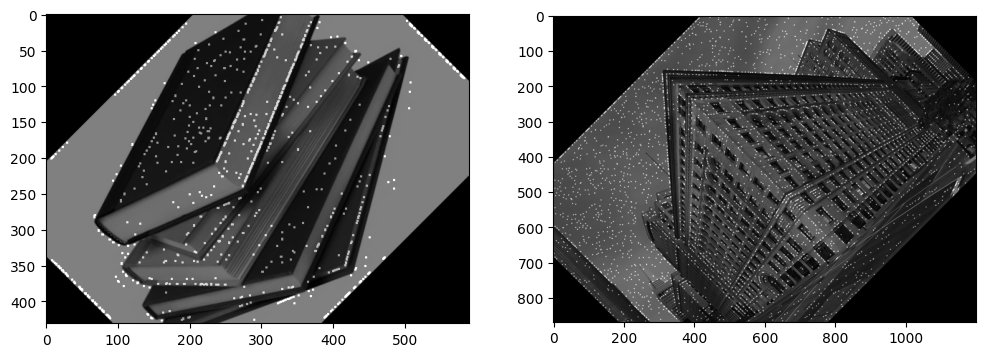

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_rotated+books_rotated_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_rotated+building_rotated_SIFT[0],cmap='gray')
plt.show()

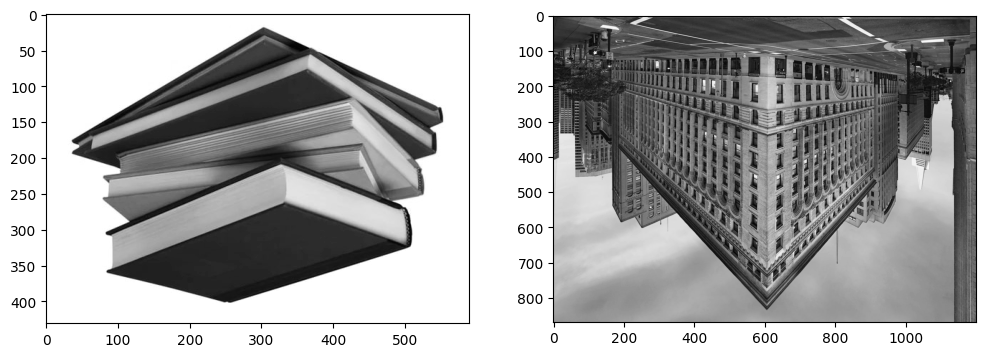

In [31]:
books_rotated180 = skimage.transform.rotate(books, 180)
building_rotated180 = skimage.transform.rotate(building, 180)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_rotated180,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_rotated180,cmap='gray')
plt.show()

In [32]:
books_rotated180_SIFT = scale_space_extrema_detection(books_rotated180)
building_rotated180_SIFT = scale_space_extrema_detection(building_rotated180)

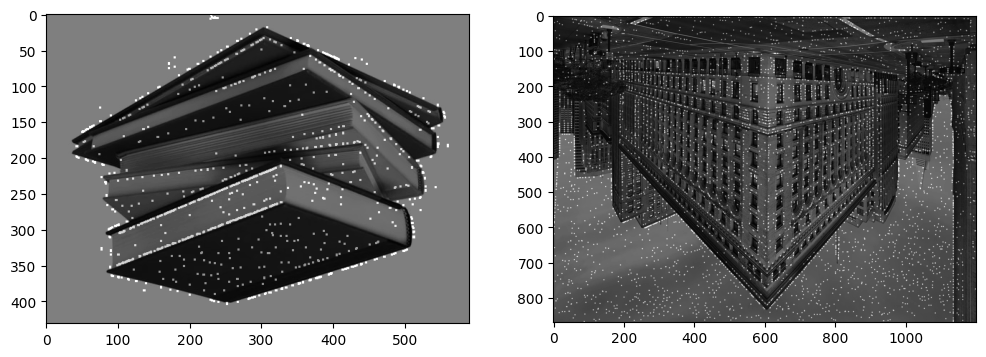

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_rotated180+books_rotated180_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_rotated180+building_rotated180_SIFT[0],cmap='gray')
plt.show()

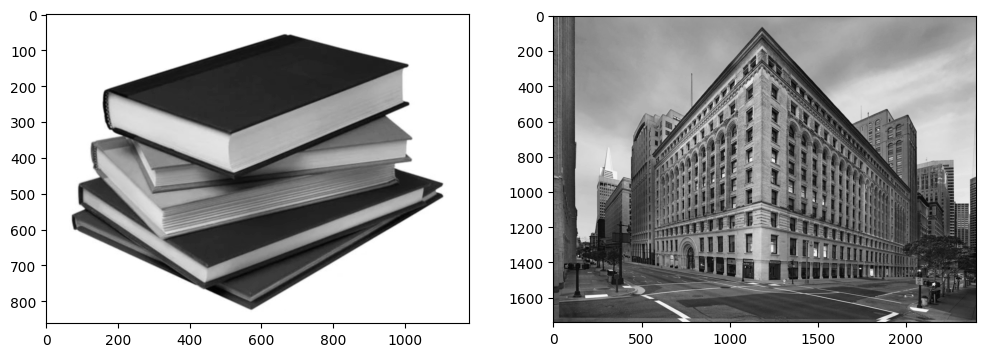

In [9]:
books_upscale = skimage.transform.rescale(books, 2, anti_aliasing=False)
building_upscale = skimage.transform.rescale(building, 2, anti_aliasing=False)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_upscale,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_upscale,cmap='gray')
plt.show()

In [10]:
books_upscale_SIFT = scale_space_extrema_detection(books_upscale)
building_upscale_SIFT = scale_space_extrema_detection(building_upscale)

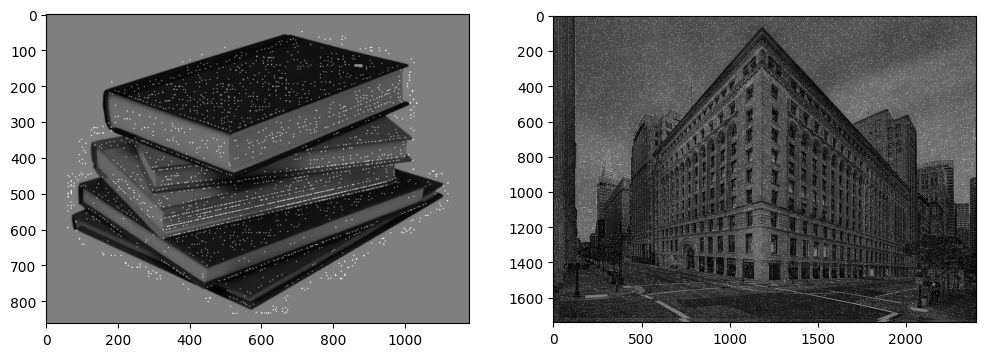

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_upscale+books_upscale_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_upscale+building_upscale_SIFT[0],cmap='gray')
plt.show()

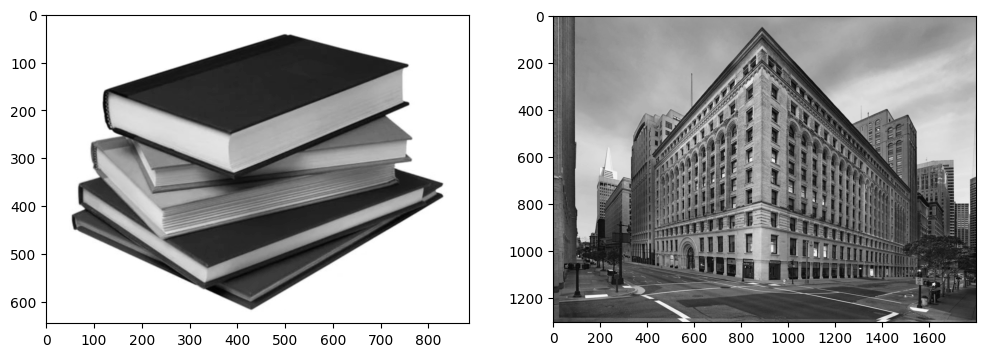

In [36]:
books_upscale2 = skimage.transform.rescale(books, 1.5, anti_aliasing=False)
building_upscale2 = skimage.transform.rescale(building, 1.5, anti_aliasing=False)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_upscale2,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_upscale2,cmap='gray')
plt.show()

In [37]:
books_upscale2_SIFT = scale_space_extrema_detection(books_upscale2)
building_upscale2_SIFT = scale_space_extrema_detection(building_upscale2)

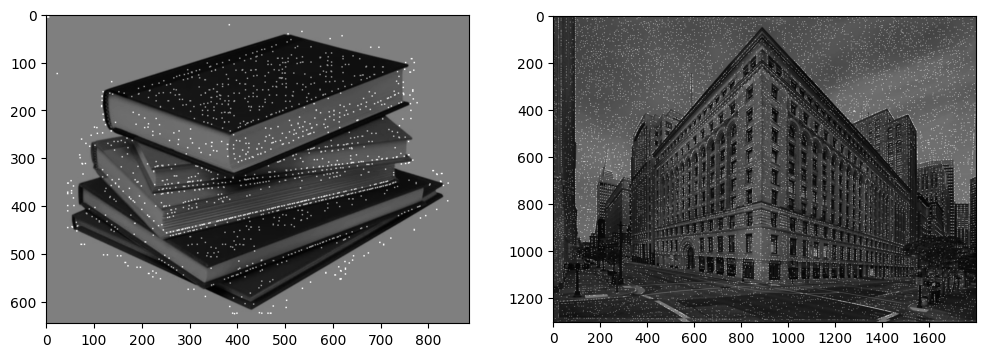

In [38]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_upscale2+books_upscale2_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_upscale2+building_upscale2_SIFT[0],cmap='gray')
plt.show()

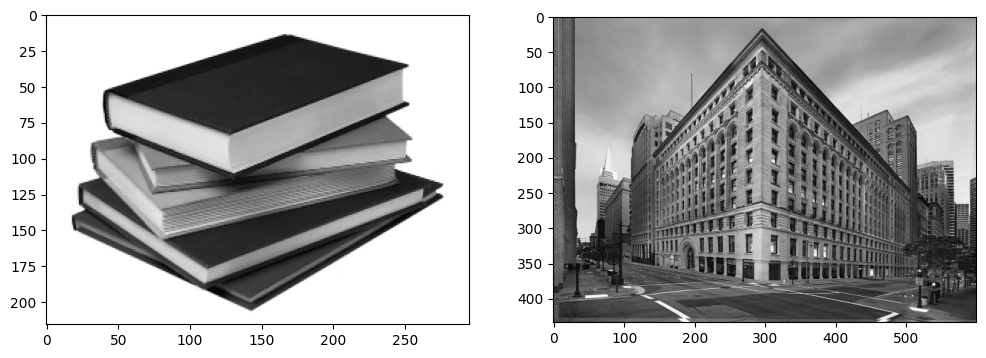

In [12]:
books_downscale = skimage.transform.rescale(books, 0.5, anti_aliasing=False)
building_downscale = skimage.transform.rescale(building, 0.5, anti_aliasing=False)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_downscale,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_downscale,cmap='gray')
plt.show()

In [13]:
books_downscale_SIFT = scale_space_extrema_detection(books_downscale)
building_downscale_SIFT = scale_space_extrema_detection(building_downscale)

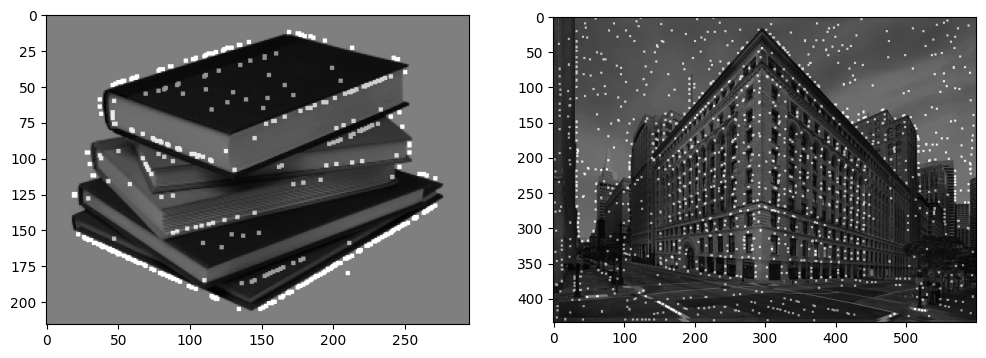

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_downscale+books_downscale_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_downscale+building_downscale_SIFT[0],cmap='gray')
plt.show()

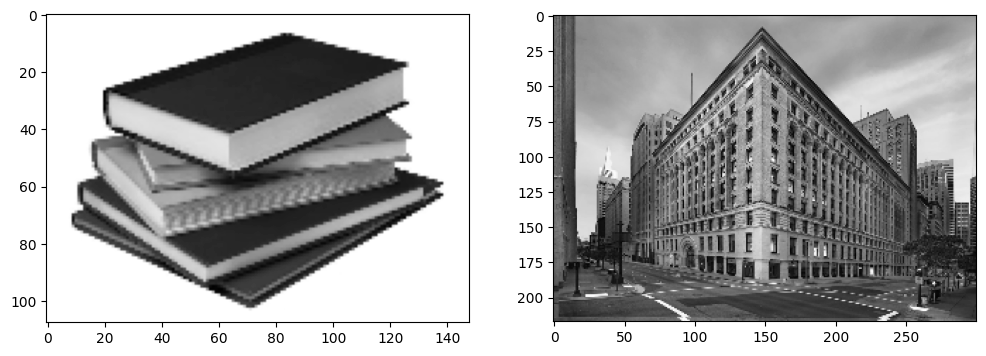

In [40]:
books_downscale2 = skimage.transform.rescale(books, 0.25, anti_aliasing=False)
building_downscale2 = skimage.transform.rescale(building, 0.25, anti_aliasing=False)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_downscale2,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_downscale2,cmap='gray')
plt.show()

In [41]:
books_downscale2_SIFT = scale_space_extrema_detection(books_downscale2)
building_downscale2_SIFT = scale_space_extrema_detection(building_downscale2)

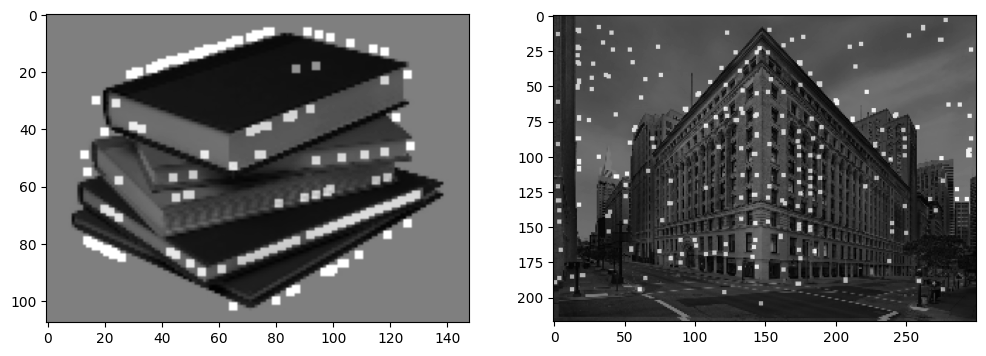

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_downscale2+books_downscale2_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_downscale2+building_downscale2_SIFT[0],cmap='gray')
plt.show()

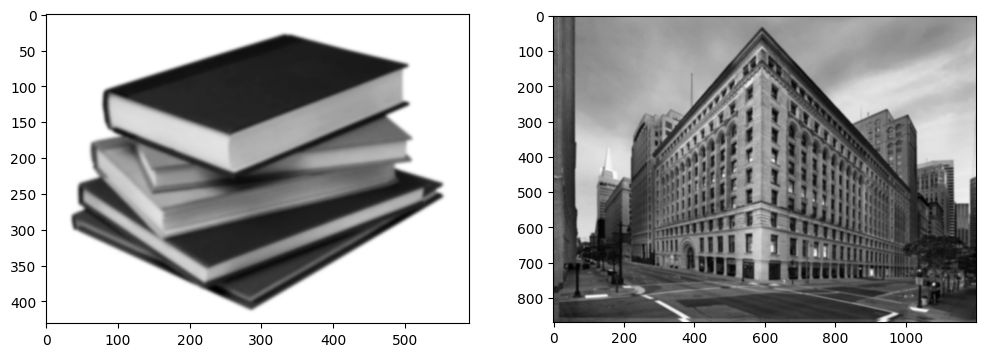

In [24]:
books_gaussianblur2 = ndimage.gaussian_filter(books, 2)
building_gaussianblur2 = ndimage.gaussian_filter(building, 2)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_gaussianblur2,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_gaussianblur2,cmap='gray')
plt.show()

In [25]:
books_gaussianblur2_SIFT = scale_space_extrema_detection(books_gaussianblur2)
building_dgaussianblur2_SIFT = scale_space_extrema_detection(building_gaussianblur2)

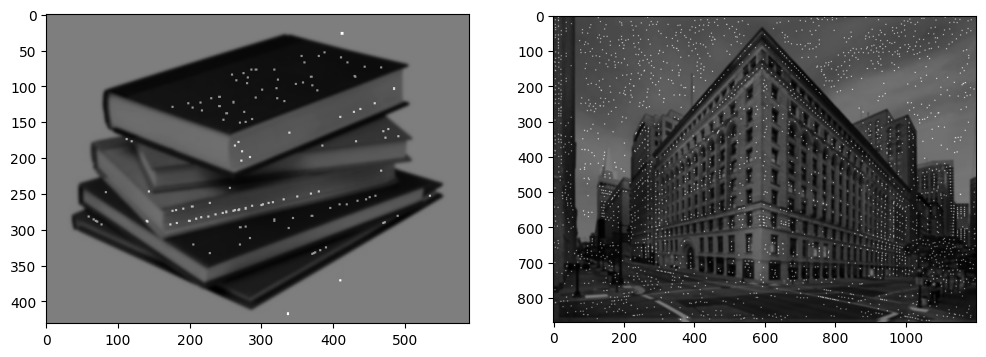

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_gaussianblur2+books_gaussianblur2_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_gaussianblur2+building_dgaussianblur2_SIFT[0],cmap='gray')
plt.show()

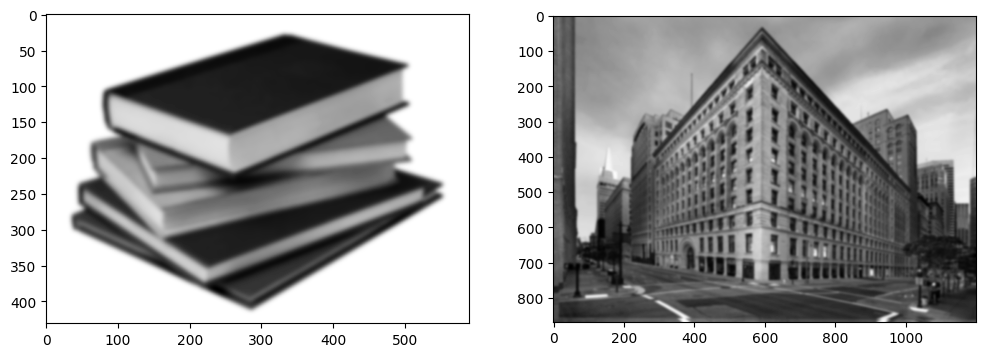

In [23]:
books_gaussianblur = ndimage.gaussian_filter(books, 3)
building_gaussianblur = ndimage.gaussian_filter(building, 3)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_gaussianblur,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_gaussianblur,cmap='gray')
plt.show()

In [16]:
books_gaussianblur_SIFT = scale_space_extrema_detection(books_gaussianblur)
building_dgaussianblur_SIFT = scale_space_extrema_detection(building_gaussianblur)

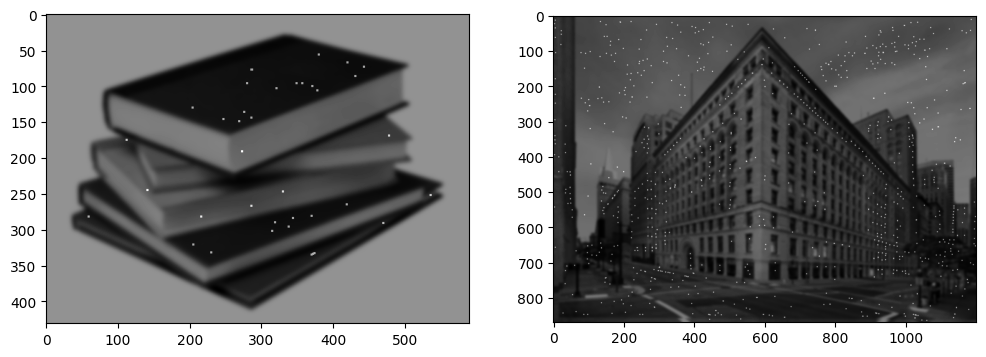

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_gaussianblur+books_gaussianblur_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_gaussianblur+building_dgaussianblur_SIFT[0],cmap='gray')
plt.show()

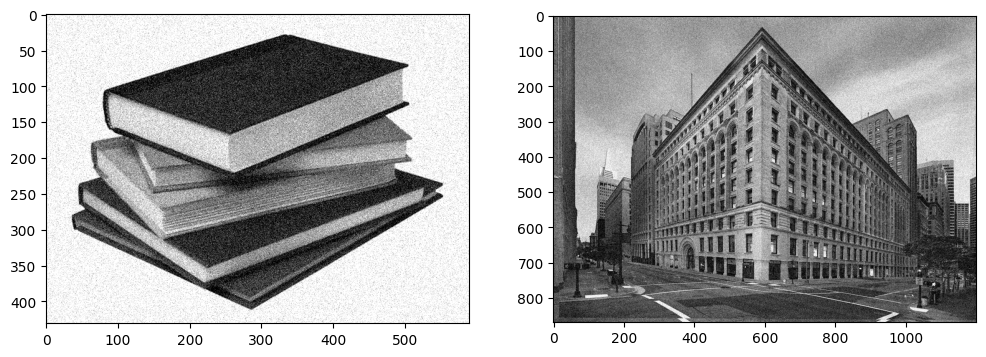

In [18]:
books_gaussian_noise = skimage.util.random_noise(books, mode='gaussian')
building_gaussian_noise = skimage.util.random_noise(building, mode='gaussian')
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_gaussian_noise,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_gaussian_noise,cmap='gray')
plt.show()

In [19]:
books_gaussian_noise_SIFT = scale_space_extrema_detection(books_gaussian_noise)
building_dgaussian_noise_SIFT = scale_space_extrema_detection(building_gaussian_noise)

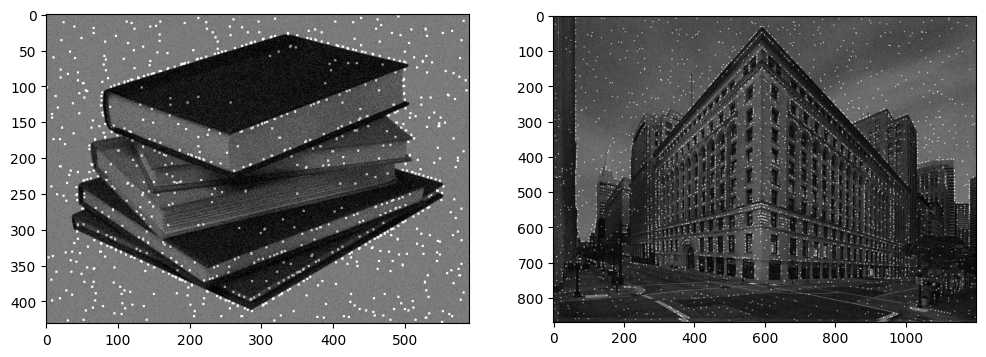

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(books_gaussian_noise+books_gaussian_noise_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(building_gaussian_noise+building_dgaussian_noise_SIFT[0],cmap='gray')
plt.show()

# Summarizing (No of features in each case)

In [43]:
table = [["Original",books_original[1],building_original[1]],["Rotation(45)",books_rotated_SIFT[1],building_rotated_SIFT[1]],["Rotation(180)",books_rotated180_SIFT[1],building_rotated180_SIFT[1]],["Upscale(x1.5)",books_upscale2_SIFT[1],building_upscale2_SIFT[1]],["Upscale(x2)",books_upscale_SIFT[1],building_upscale_SIFT[1]],["Downscale(x0.5)",books_downscale_SIFT[1],building_downscale_SIFT[1]],["Downscale(x0.25)",books_downscale2_SIFT[1],building_downscale2_SIFT[1]],["Gaussian Blur(sigma = 2)",books_gaussianblur2_SIFT[1],building_dgaussianblur2_SIFT[1]],["Gaussian Blur(sigma = 3)",books_gaussianblur_SIFT[1],building_dgaussianblur_SIFT[1]],["Gaussian Noise",books_gaussian_noise_SIFT[1],building_dgaussian_noise_SIFT[1]]]  
headers = ["Type", "Books","Building"]
print(tabulate(table, headers, tablefmt="fancy_grid"))



╒══════════════════════════╤═════════╤════════════╕
│ Type                     │   Books │   Building │
╞══════════════════════════╪═════════╪════════════╡
│ Original                 │     999 │       4978 │
├──────────────────────────┼─────────┼────────────┤
│ Rotation(45)             │     920 │       4292 │
├──────────────────────────┼─────────┼────────────┤
│ Rotation(180)            │    1022 │       4977 │
├──────────────────────────┼─────────┼────────────┤
│ Upscale(x1.5)            │    1463 │      12996 │
├──────────────────────────┼─────────┼────────────┤
│ Upscale(x2)              │    2610 │      25069 │
├──────────────────────────┼─────────┼────────────┤
│ Downscale(x0.5)          │     389 │       1346 │
├──────────────────────────┼─────────┼────────────┤
│ Downscale(x0.25)         │     140 │        251 │
├──────────────────────────┼─────────┼────────────┤
│ Gaussian Blur(sigma = 2) │     149 │       2649 │
├──────────────────────────┼─────────┼────────────┤
│ Gaussian B